## Quantum Illumination Experiment 1

__Calculate Helstrom bound for one-time measurements.__
__Calculate Quantum Chernoff bound.__

- Author: L. Fan
- Created Date: 2017-11-16
- The Second Latest Modified: 2017-11-16
- The Latest Modified: 2017-11-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configuration
from IPython.display import set_matplotlib_formats
plt.style.use(['seaborn-whitegrid', '14pt'])
set_matplotlib_formats('pdf', 'png')
np.set_printoptions(threshold='nan', precision=6, suppress=True)
%matplotlib inline

### Experiment Setup

__func:__

    def run_all_states(state_names, n_max, nth, ns, rflct, rs, df):
        """
        run experiments given the provided parameters

        Parameters
        ----------
        state_names: tuple of string, indicating input states
        n_max: integer, truncated photon numbers
        nth: double, average thermal noise number
        ns: double, N_s parameter of the two mode squeezed state
        rflct: double, reflectance of the target object
        rs: tuple of double, parameters for PCS states
        df: dataframe, running results

        Returns
        -------
        df: a pandas dataframe recording running results
        """

__log:__

    /home/rigel/code_research/quantum_illumination/qillumi/run_expr_1.py

    2017-11-19 18:03:49: 1 run_all_states(8, 0.1, 0.01, 0.01, (0.4, 0.4))  
    2017-11-19 18:03:50: 2 run_all_states(24, 1.0, 0.01, 0.01, (0.4, 0.4))        
    2017-11-19 18:04:18: 3 run_all_states(32, 10.0, 0.01, 0.01, (0.4, 0.4)

    --- 188.99801182746887 seconds ---

    2017-11-19 18:49:45: 1 run_all_states(16, 0.5, 0.01, 0.01, (0.4, 0.4))        
    2017-11-19 18:49:49: 2 run_all_states(24, 2.0, 0.01, 0.01, (0.4, 0.4))        
    2017-11-19 18:50:18: 3 run_all_states(32, 4.0, 0.01, 0.01, (0.4, 0.4)) 

    --- 193.2452471256256 seconds ---


In [2]:
df_one = pd.read_csv('../output/expr_1_basic_11-26.csv', comment='#')
df_one.fillna("", inplace=True)

In [3]:
df_one.head()

,Nth,R,State,lambda,Aver_N,VN_Entropy,Helstrom_Bound,Chernoff_Bound,optimal_s,A_aver_N,B_aver_N,ra,rb
0,0.1,0.01,TMSS,0.099504,0.020000,0.056102,0.495279,0.499957,0.500273,0.010000,0.010000,,
1,0.1,0.01,PS,0.099504,0.079608,0.168732,0.490605,0.499839,0.500273,0.039804,0.039804,,
2,0.1,0.01,PA,0.099504,2.079608,0.168732,0.485689,0.499632,0.498223,1.039804,1.039804,,
3,0.1,0.01,PSA,0.099504,0.300129,0.439049,0.481975,0.499450,0.500273,0.150064,0.150064,,
4,0.1,0.01,PAS,0.099504,2.300129,0.439049,0.474331,0.498892,0.499102,1.150064,1.150064,,


### Plot

### 1.1 Helstrom bounds and Chernoff bounds for different states under different noise levels

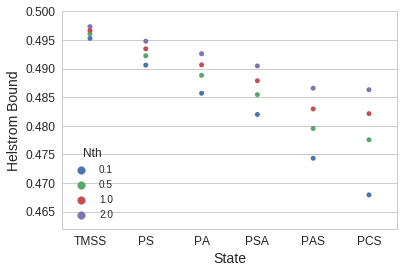

In [4]:
fig, ax = plt.subplots()
sns.stripplot(x='State', y='Helstrom_Bound', hue='Nth', data=df_one, ax=ax)
ax.set_ylim(0.462, 0.50)
ax.set_ylabel('Helstrom Bound')
# ax.set_title('Helstrom Bound for Different States')
plt.savefig('../output/g_qhb_vs_states.pdf', bbox_inches='tight')

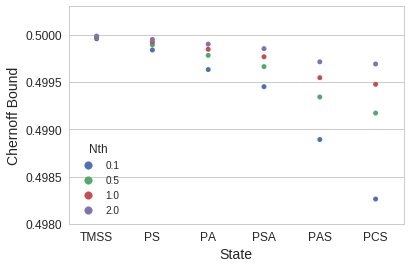

In [5]:
fig, ax = plt.subplots()
sns.stripplot(x='State', y='Chernoff_Bound', hue='Nth', data=df_one, ax=ax)
ax.set_ylim(0.498, 0.5003)
ax.set_ylabel('Chernoff Bound')
# ax.set_title('Quanutm Chernoff Bound for Different States')
plt.savefig('../output/g_qcb_vs_states.pdf', bbox_inches='tight')

In [6]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# sns.stripplot(x='State', y='Helstrom_Bound', hue='Nth', data=df_one, ax=ax1)
# ax1.set_ylim(0.462, 0.502)
# sns.stripplot(x='State', y='Chernoff_Bound', hue='Nth', data=df_one, ax=ax2)
# ax2.set_ylim(0.498, 0.5002)
# plt.subplots_adjust(wspace=0.25)

### 1.2 Helstrom bounds with repsect to entropy and average photon numbers

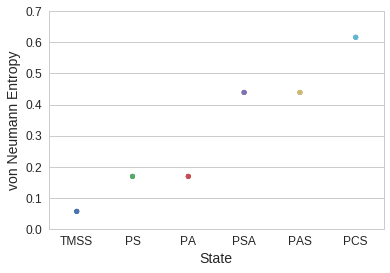

In [7]:
fig, ax = plt.subplots()
sns.stripplot(x='State', y='VN_Entropy', data=df_one, ax=ax)
ax.set_ylim(0.0, 0.7)
ax.set_ylabel('von Neumann Entropy')
plt.savefig('../output/g_entropy_vs_states.pdf', bbox_inches='tight')

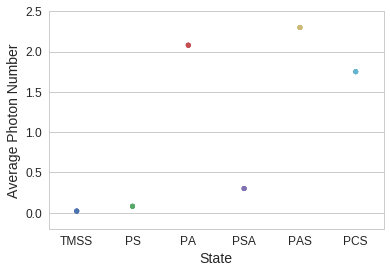

In [8]:
fig, ax = plt.subplots()
sns.stripplot(x='State', y='Aver_N', data=df_one, ax=ax)
ax.set_ylim(-0.2, 2.5)
ax.set_ylabel('Average Photon Number')
plt.savefig('../output/g_nbar_vs_states_basic.pdf', bbox_inches='tight')

### 1.3 Chernoff bounds with respect to measurement times

In [9]:
def upper_bound(QCB, M):
    """ Upper bound (Quantum Chernoff bound) of the error probability
        using s = 1/2
    """
    return 0.5 * QCB ** M

def calc_chernoff_data(df, Nth, states, xlow, xhigh, points):
    ms = np.logspace(xlow, xhigh, points)
    df = df[df['Nth'] == Nth]
    dict_temp = {}
    for name in states:
        qcb = df[df['State'] == name]['Chernoff_Bound'].values[0] * 2
        print("{}: {:.11f}".format(name, qcb))
        dict_temp[name] = [upper_bound(qcb, n) for n in ms]
    return pd.DataFrame(dict_temp, index=ms)

def plot_chernoff_data(df, ylow, yhigh, title):
    fig, ax = plt.subplots()
    df.plot(loglog=True, ax=ax)
    ax.set_ylim(ylow, yhigh)
    ax.set_xlabel("$\log_{10}M$")
    ax.set_ylabel("$\log_{10}P_{err}$")
    ax.set_title("QCB vs. M, " + title)
    ax.legend(fontsize=12)

In [10]:
states = ('TMSS', 'PS', 'PSA', 'PCS')
df01 = calc_chernoff_data(df_one, 0.1, states, 3, 6, 50)
df1 = calc_chernoff_data(df_one, 1.0, states, 3, 6, 50)
df2 = calc_chernoff_data(df_one, 2, states, 3, 6, 50)

TMSS: 0.99991419983
PS: 0.99967711216
PSA: 0.99890051570
PCS: 0.99652427632
TMSS: 0.99995632076
PS: 0.99984647112
PSA: 0.99953270662
PCS: 0.99895149025
TMSS: 0.99997120287
PS: 0.99990066392
PSA: 0.99970540428
PCS: 0.99938097368


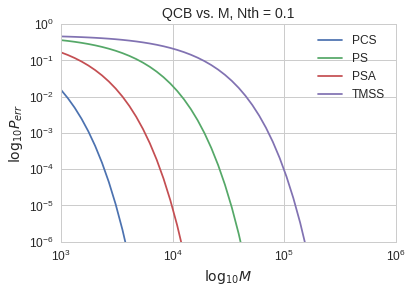

In [11]:
plot_chernoff_data(df01, 1e-6, 1, "Nth = 0.1")
plt.savefig('../output/g_perr_vs_M_01.pdf', bbox_inches='tight')

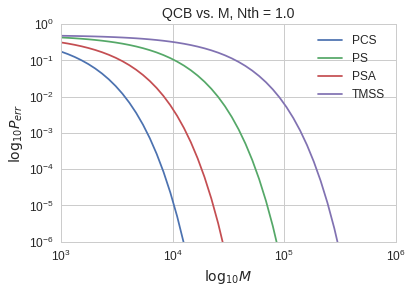

In [12]:
plot_chernoff_data(df1, 1e-6, 1, "Nth = 1.0")
plt.savefig('../output/g_perr_vs_M_1.pdf', bbox_inches='tight')

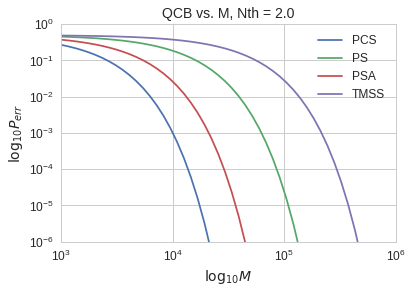

In [13]:
plot_chernoff_data(df2, 1e-6, 1, "Nth = 2.0")
plt.savefig('../output/g_perr_vs_M_2.pdf', bbox_inches='tight')